# Hidden Markov Models (HMMs)

## Introduction

The world we live in is evolving over time, but we often do not perceive the causes, only the consequences: we can observe the current weather but not the physical phenomenons that led to it. Trying to predict the weather is a hard task partially due to those hidden causes: we don't know exactly what is causing what and how everything is linked.

*Hidden Markov Models (HMMs)* are a class of models that allow us to reason about **the dynamics of a set of unobserved states that lead to the changing sensory inputs or data we observe.**

HMMs originate from the field of probability theory and have proven to be useful in speech recognition, bioinformatics, finance, and more.

In this notebook, we will:
- (re)introduce the notions of Markov chains and Hiden Markov Models
- address  the 3 fundamental problems inherent to HMMs
- see an example of the HMM usefulness


<img src="img/intro_smiley.PNG" width="600px"></img>

*Markov representation of your state of understanding before and after this notebook*




In [24]:
import numpy as np
import pandas as pd

## 1. Context: the different Markov Models

### 1.1 Quick Markov Chains recalls

As its name implies, HMMs are complexified Markov chains.

<div class="alert alert-success">
    
A **Markov chain** or **Markov process** is a stochastic model describing a sequence of possible events in which the *probability of each event depends only on the state attained in the previous event.*

Therefore,  according to the **Markov assumption** : $P(q_i = a | q_1, \ldots, q_{i-1}) = P(q_i = a | q_{i-1})$
</div>

A Markov chain can be described by:
- a set of **N** *states* $Q = Q_1, ..., Q_N$
- a *transition probability matrix* **A** where $a_ij$ represents the probability of going from state i to state j
- an *initial probability distribution* **$\pi$** where $\pi_i$ gives the probability of the Markov chain starting in state i

<div class="alert alert-info">

*Note:* throughout this notebook, we will restrain ourselves to Markov chains evolving in a space E **countable** and **homogeneous in time.**
</div>

</center>
<img src="img/Markov_chain.PNG" width="400px"></img>  

<br></center>

<details class="alert alert-danger">
    <summary markdown="span"><b>Can you try to infer the probability of the sequence Q2 Q1 Q1? (click to expand)</b></summary>

$P(Q_2 Q_1 Q_1) = 0.147$

/!\ Did you notice that     $\sum_{j=1}^{N} a_{ij} = 1$    ?

</details>

### 1.2 Hidden Markov Models

Now, it happens sometimes that we can't observe the states, but rather events caused by them.

Let's say you are a doctor, whose patients only have 2 states: Healthy or Sick. Despite your many years of studies and practice, you can't really observe whether your patient is sick or fine. Rather, given some **symtoms that you can *observe* and measure**, you can **guess** with a reasonable probability his ***state* of health**. 

This is what a Hidden Markov Model is about.

<img src="img/Markov_chain_vs_HMM.PNG" width="800px"></img>



<div class="alert alert-success">
    
A **hidden Markov model (HMM)** is a Markov model in which the **observations are dependent on a latent (or "hidden") Markov process**. An HMM requires that there be an observable process whose outcomes depend on the outcomes of the hidden Markov process in a known way.

</div>

Therefore, a HMM can be described by the following components:
- a set of **N** *states* $Q = q_1, ..., q_N$
- a *transition probability matrix* **A** where $a_{ij}$ represents the probability of going from state i to state j
- a sequence of **T** *observations* $O=o_1, ..., o_T$ drawn from a vocabulary $V=v_1, ..., v_V$
- a sequence of *observation likelihoods* (or *emission probabilities*) $B=b_i(o_t)$ expressing the probability of the observation $o_t$ being caused by the state i
- an *initial probability distribution* **$\pi$** where $\pi_i$ gives the probability of the Markov chain starting in state i

Taking the previous example, this is how the model should be visualized:

</center><img src="img/HMM_graph.PNG" width="800px"></img>  <br></center>


<div class="alert alert-info">

*Note:* for the rest of this notebook, as we will be using np.arrays to code, we will need to index the states and observations. Therefore ***Healthy*** will be indexed as **0** and ***Sick*** as **1**, while the observations will be respectively indexed as follow: **{*Fine*: 0}, {*Cold*: 1}, {*Dizzy*: 2}**.
</div>


<div class="alert alert-success">

As it was for the Markov chain, the *probability of each event depends only on the state attained in the previous event.*  (Markov assumption)

<center>
<br>

$P(q_i = a | q_1, \ldots, q_{i-1}) = P(q_i = a | q_{i-1})$ 
</center>


Moreover, the **probability of an output** observation $o_i$ **depends only on the state that produced the observation** $q_i$ and not on any other states or any other observations (**Independance assumption**): 
<center>
<br>

$P(o_i | q_1, \ldots, q_T, o_1, \ldots, o_i, \ldots, o_T) = P(o_i | q_i)$
</center>

Finally, it will be assumed that state transition probabilities are independant of the actual time at which the transitions take place (**Stationary assumption**):
<center>
<br>

$P(q_{t_1 + 1} = j | q_{t_1} = i) = P(q_{t_2 + 1} = j | q_{t_2} = i)$ for time $t_1$ and $t_2$
</center>

</div>







Our HMM $\lambda = (A, B, \pi)$ can be implemented as follow

In [25]:
A = np.array([[0.8, 0.2],
              [0.5, 0.5]])

B = np.array([[0.7, 0.2, 0.1],
              [0.3, 0.4, 0.3]])

pi = np.array([0.5, 0.5])


In [26]:
print("Our example is described by the following\n")
print("Transition Matrix\n A=", A, "\n")
print("Emission Matrix\n B= ", B, "\n")
print("Initial probability distribution\n pi = ", pi, "\n")

Our example is described by the following

Transition Matrix
 A= [[0.8 0.2]
 [0.5 0.5]] 

Emission Matrix
 B=  [[0.7 0.2 0.1]
 [0.3 0.4 0.3]] 

Initial probability distribution
 pi =  [0.5 0.5] 



To apply the model to real-world problems, the community (led by **Rabiner** and his [influential tutorial](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi_tqzw2KOEAxVWcKQEHYaSBZ8QFnoECBAQAQ&url=https%3A%2F%2Fwww.cs.ubc.ca%2F~murphyk%2FBayes%2Frabiner.pdf&usg=AOvVaw196t6QWhJj5gGV-7SiYaJk&opi=89978449)) came up with 3 basic problems that need to be solved.

<div class="alert alert-warning">

- **Problem 1 (Likelihood)**: Given an HMM $\lambda = (A,B, \pi)$ and an observation sequence O, determine the likelihood $P(O|\lambda)$.
- **Problem 2 (Decoding)**: Given an observation sequence O and an HMM $\lambda =(A,B,\pi)$, find the most probable sequence of states Q.
- **Problem 3 (Learning)**: Given an observation sequence O and the set of statesin the HMM, learn the HMM parameters A and B.

</div>

Each of these 3 problems have real-world application:
- **Likelihood Problem**: In [*speech recognition*](https://ieeexplore.ieee.org/document/4767370) systems, the evaluation problem helps determine the likelihood of a given sequence of observed acoustic features (speech signals) given the model. This is crucial for identifying and understanding spoken words.
- **Decoding Problem**:  In [*Natural Language Processing*](https://yashikajournals.com/index.php/mlaeem/article/view/22), the decoding problem is used for part-of-speech tagging, where the most likely sequence of hidden states (parts of speech) is determined based on observed words in a sentence. This helps analyze and understand the grammatical structure of a text.
- **Learning Problem**: In [*financial modeling*](https://www.researchgate.net/publication/234135825_Markov_Financial_Model_Using_Hidden_Markov_Model), the learning problem is applied to estimate the parameters of an HMM based on observed stock prices. By adjusting the transition probabilities and emission probabilities, the model can be trained to capture underlying patterns and trends in financial markets.

## 2. Solving the 3 fundamental problems

### 2.1. The Forward algorithm to solve the likelihood problem

The problem at hand here is the following:

<div class="alert alert-warning">

**Problem 1 (Likelihood)**: Given an HMM $\lambda = (A,B, \pi)$ and an observation sequence O, determine the likelihood $P(O|\lambda)$.

</div>

Applied to our example, the goal would be to determine the probability of obtaining the sequence **Cold - Fine - Dizzy - Cold**

<div class="alert alert-info">

*Note*: Remember, as we said before we are working with numpy arrays so every sequence will start at the index 0 : $O = o_0, ..., o_{T-1}$
</div>


#### 2.1.1. Naive solving

<div class="alert alert-info">

*Note:* To simplify notations, the HMM model $\lambda$ will be implied: $P(O|\lambda) = P(O)$. But remember that every operation can only make sense for a given model $\lambda = (A, B, \pi)$

</div>

With a Markov process, it would have been fairly simple:

Let's consider a state sequence $Q = q_0, q_1, ..., q_{N-1}$, where $q_0$ and $q_{N-1}$ are initial and final states, respectively. The probability of an observation sequence O generated by a state sequence Q can be represented as

<center><br>  

$P(O|Q)= \Pi_{i=0}^{T-1} P(o_i|q_i)$ 

</center>

Applied to our example we would have 

$P(Cold, Fine, Dizzy, Cold | Q) = P(Cold|q_0) . P(Fine | q_1) . P(Dizzy|q_2) . P(Cold | q_3)$

However, we don't know the actual sequence that the hidden states $q_i$ followed. Therefore we need to take every sequence into account. 

<center><br> 

$P(O) = \sum_{Q} P(O,Q) = \sum_{Q} P(O|Q)P(Q)$

</center>

Since we have 2 states, there can be 16 combinations resulting in our 4-length observation sequence.


<details class="alert alert-danger">
    <summary markdown="span"><b>Can you guess the complexity for a sequence of T observations and N hidden states ? (click to expand)</b></summary>

The complexity would be exponential $O(N^{T})$

For a simple example as ours, brute forcing is feasible, but 50 observations on a HMM with 10 states would generate $10^{50}$ operations. 

</details>




#### 2.1.2. The Forward Algorithm

It relies on *dynamic programming*, meaning it uses a table to store itermediate values, named *forward trellis*. 

<div class="alert alert-success">
    
The cells of the forward trellis are given by:
<center>
<br>

$\alpha_{t}(j)= P(o_1, \ldots, o_t, q_t = j)$ for $0 \le t \le T-1$

</center>

To obtain this probability, you have to sum over all the paths that end up generating the cell, at the time $t$ in the state $q_j$

Therefore:

<center>
<br>

$\alpha_{t}(j)= \sum_{i = 0}^{N-1} \alpha_{t-1} a_{ij} b_j(o_t)$
</center>

where
- $\alpha_{t-1}$ is the *previous forward probability* from the previous time step
- $a_{ij}$ is the *transition probability* from previous state $q_i$ to current state $q_j$
- $b_j(o_t)$ is the *state observation likelihood* of the obervation $o_t$ generated by the tate $j$

</div>

<img src="img/Forward_figure.PNG" width="800px"></img>

<details class="alert alert-danger">
    <summary markdown="span"><b>Can you compute by hand the forward probability $\alpha_{1}(0)$? (click to expand)</b></summary>

$\alpha_{0}(0) = P(0|start) * P(o_0|0) = 0.5 * 0.2 = 0.1$

$\alpha_{0}(1) = P(1|start) * P(o_0|1) = 0.5 * 0.4 = 0.2$


$\alpha_{1}(0) = \alpha_{0}(0) * P(0|0) * P(o_1|0) + \alpha_{0}(1) * P(0|1) * P(o_1|0) = 0.1 * 0.8 * 0.7 + 0.2 * 0.5 * 0.7 = 0.126$ 

</details>





The forward algorithm will be therefore implemented as follow: 

- Initialization step:
<center>
<br>

$\alpha_{0}(j) = \pi_{j} b_j(o_0)$ with $0 \le j \le N-1 $ 

</center>

- Recursion step 

<center>
<br>

$\alpha_{t}(j)= \sum_{i = 0}^{N-1} \alpha_{t-1}(i) a_{ij} b_j(o_t)$ with $0 \le j \le N-1$ and $0 \le t \le T-1$

</center>

- Termination step

<center>
<br>

$P(O)= \sum_{i = 0}^{N-1} \alpha_{T-1}(i)$

</center>

<div class="alert alert-warning">

**Excercise**

Try and complete the Forward algorithm below

</div>

In [27]:
#%load solutions/forward.py
def forward(A, B, pi, observations):
    """
    Returns the likelihood probability
    """
    T = len(observations)
    N = pi.shape[0]
    
    alpha = np.zeros((N, T))
    
    # Initialization

    #############
    # CODE HERE #
    #############

    
    # Recursion 
    
    #############
    # CODE HERE #
    #############
                
    
    #print(alpha)
    
    return np.sum(alpha[:, T-1])

In [28]:
states = 0, 1
observations = [1,0,1,2]

final_prob = forward(A, B, pi, observations)
print("\n \nProbability of the observed sequence is: ", final_prob)


 
Probability of the observed sequence is:  0.0


### 2.2. Solving the decoding problem



<div class="alert alert-warning">

- **Problem 2 (Decoding)**: Given an observation sequence O and an HMM $\lambda =(A,B,\pi)$, find the most probable sequence of states Q

</div>

The intuitive solution would be to run the forward algorithm for each hidden state sequence and select the one whose likelihood is the highest. But as we've seen before, the computation would be exponential and so counterproductive.

Rather, the usual decoding algorithm is the **Viterbi algorithm**. It is, like the forward algorithm, a *dynamic programming* algorithm that uses a dynamic programming trellis.

Much like the forward algorithm, the value of each trellis cell is computed recursively, by taking the maximum over all previous state sequences. With the probabilities of being in every cell at $t-1$ all already computed, we only have to take the most probable path extention to get to our current cell


<div class="alert alert-success">
    
More formally,  the most probable path that can lead to current cell $v_t(j)$ can be written
<center>
<br>

$v_t(j)= \max _{q_0, ..., q_{t-1}} P(q_0, \ldots, q_{t-1}, o_1, ..., o_t, q_t = j)$

</center>

Meaning we only have to compute

<center>
<br>

$v_{t}(j)= \max_{i = 0}^{N-1} v_{t-1} a_{ij} b_j(o_t)$
</center>

where
- $v_{t-1}$ is the *previous Viterbi path probability* from the previous time step
- $a_{ij}$ is the *transition probability* from previous state $q_i$ to current state $q_j$
- $b_j(o_t)$ is the *state observation likelihood* of the obervation $o_t$ generated by the tate $j$

</div>

Where the Viterbi algorithm differentiates itself from the forward algorithm, is the need for **backtracking** pointers, in order to keep trace of the best sequence possible. You can see it illustrated by red arrows on the figure bellow

<img src="img/viterbi_figure.PNG" width="800px"></img>

<details class="alert alert-danger">
    <summary markdown="span"><b>Can you compute by hand the Viterbi path probability ? Can you understand why the red arrows point towards the Sick state ? (click to expand)</b></summary>

$v_{0}(0) = P(0|start) * P(o_0|0) = 0.5 * 0.2 = 0.1$

$v_{0}(1) = P(1|start) * P(o_0|1) = 0.5 * 0.4 = 0.2$


$v_{1}(0) = \max(v_{0}(0) * P(0|0) * P(o_1|0) , v_{0}(1) * P(0|1) * P(o_1|0)) = \max(0.056, 0.07) = 0.07$ 

$v_{1}(1) = \max(v_{0}(0) * P(1|0) * P(o_1|1) , v_{0}(1) * P(1|1) * P(o_1|1)) = \max(0.006, 0.03) = 0.03$ 

The maximum computed for the second observation always comes from the Sick state of the first observation, hence the red arrows.

</details>


The recursion computation will resemble closely to that of the forward algorithm, with the addition of the backtracking (more detailled explanations [here](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C5/C5S3_Viterbi.html)):
- **Initialization step**:
<center>
<br>

$v_{0}(j) = \pi_{j} b_j(o_0)$ with $0 \le j \le N-1 $ 

$bt_0(j) = 0$ with $0 \le j \le N-1 $

</center>

- **Recursion step**

<center>
<br>

$v_{t}(j)= \max_{i = 0}^{N-1} v_{t-1}(i) a_{ij} b_j(o_t)$ with $0 \le j \le N-1$ and $0 \le t \le T-1$

$bt_{t}(j)= \argmax_{i = 0}^{N-1} v_{t-1}(i) a_{ij} b_j(o_t)$ with $0 \le j \le N-1$ and $0 \le t \le T-1$

</center>

- **Termination step**

<center>
<br>

The best probability obtainable : $P= \max_{i = 0}^{N-1} v_{T-1}(i)$

Start of the backtrace: $q_T= \argmax_{i = 0}^{N-1} v_{T-1}(i)$

</center>


<div class="alert alert-warning">

**Excercise**

Try and complete the Viterbi algorithm below

</div>



In [37]:
#%load solutions/viterbi.py

def viterbi(A, B, pi, observations):
    """
    Returns the optimal state sequence and the probability associated
    """

    N = A.shape[0]    # Number of states
    T = len(observations)  # Length of observation sequence

    v = np.zeros((N, T))
    bt = np.zeros((N, T-1))
    Q_opt = np.zeros(T)

    ### Initialization
    v[:, 0] = pi * B[:, observations[0]]

    ### Recursion

    #############
    # CODE HERE #
    #############

    ###Termination    
    # Backtracking

    #############
    # CODE HERE #
    #############
    
    # Best probability
    best_prob = np.max(v[:, T-1])
    
    #print(v)

    return Q_opt, best_prob

Try and change the observation set to see if the optimal state sequence is coherent

In [39]:
observations = [1,0,1,2]
#observations = [2,1,0,0]

# Apply Viterbi algorithm
Q_opt, best_prob = viterbi(A, B, pi, observations)
#
print('Observation sequence:   O = ', observations)
print('Optimal state sequence: Q = ', Q_opt)

Observation sequence:   O =  [1, 0, 1, 2]
Optimal state sequence: Q =  [1. 1. 1. 1.]


### 2.3. How to train your HMM

<div class="alert alert-warning">

- **Problem 3 (Learning)**: Given an observation sequence O and the set of states in the HMM, learn the HMM parameters A and B.

</div>

This is the hardest problem to solve. The common algorithm used to train a HMM is the **forward-backward** algorithm, also known as the [**Baum-Welch**](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjg1sKg2qOEAxWYU6QEHcwGA-EQFnoECBEQAQ&url=https%3A%2F%2Ffiles.library.northwestern.edu%2Fpublic%2FFiles%2FBaum.pdf&usg=AOvVaw3CnMHhD5gSxw2Ly9PvKFVP&opi=89978449) algorithm. It is a special case of the [**Expectation-Maximization**](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjN9sq72qOEAxXQV6QEHUBuArwQFnoECBMQAQ&url=https%3A%2F%2Fwww.ece.iastate.edu%2F~namrata%2FEE527_Spring08%2FDempster77.pdf&usg=AOvVaw0Ye3rcKAlJPA7TSt19alwJ&opi=89978449) (EM) algorithm. It doesn't provide the exact solution, but a good-enough approximation.

It is an **iterative algorithm** that computes an estimation of the model and then uses it to better the estimation until convergence. 

Intuitively, we can estimate $\hat{a}_{ij}$ by a variant of maximum likelihood expectation:

<center>
<br>

$\hat{a}_{ij} = \frac{\text{expected number of transitions from state i to state j}}{\text{expected number of transitions from state i}}$
</center>

Similarly, to compute the observation probability, we must find the probability of observing a symbol $v_k$ given the state j:
<center>
<br>

$\hat{b}_{ij} = \frac{\text{expected number of times in  state j and observing symbol vk}}{\text{expected number of times from in state j}}$
</center>

As the algorithm is called forward-backward algorithm, we'll need to **compute** respectively the **forward $\alpha_t(i)$** and **backard $\beta_t(i)$** probabilities, as we will need them in our calculus. The forward probability is the same as the one used for the likelihood probability:



In [31]:
def forward_computation( A, B, pi, observations):
    T = len(observations)
    N = A.shape[0]
    alpha = np.zeros((T, N))
    alpha[0, :] = pi * B[:, observations[0]]
 
    for t in range(1,T):
        for j in range(N):
            product = alpha[t-1, :] * A[:, j] * B[j, observations[t]]
            alpha[t, j] = np.sum(product)
 
    return alpha

In [32]:
observations = [1,0,1,2]

alpha = forward_computation( A, B, pi, observations)

print("Forward probability\n alpha = \n", alpha)



Forward probability
 alpha = 
 [[0.1       0.2      ]
 [0.126     0.036    ]
 [0.02376   0.01728  ]
 [0.0027648 0.0040176]]


As for the **bacward probability**, it is the probability of seing the given observations from time $t+1$ until the end, knowing that we are in a state $i$ at time $t$

<center>
<br>

$\beta_{t}(i) = P(o_{t+1}, ..., o_T|q_t =i)$
</center>

It is computed much like the forward probability:

- **Initializalion step**

<center>
<br>

$\beta_{T}(i)= 1$ with $0 \le i \le N-1$
</center>

- **Recursion step**

<center>
<br>

$\beta_{t}(i)= \sum_{j=0}^{N-1} a_{ij}b_j(o_{t+1})\beta_{t+1}(j)$ with $0 \le i \le N-1 $ and $ $0 \le t \le T-1$
</center>

- **Termination step**

<center>
<br>

$P(O) = \sum_{j= 0}^{N-1} \pi_{j} b_j(o_0) \beta_0(j)$
</center>

<div class="alert alert-warning">

**Excercise**

Try and complete the backward algorithm

</div>



In [21]:
# %load solutions/backward.py
def backward_computation( A, B, observations):
    T = len(observations)
    N = A.shape[0]
    beta = np.zeros((T, N))
 
    # Initialization
    
    #############
    # CODE HERE #
    #############
 
    # Recursion
    
    #############
    # CODE HERE #
    #############
 
    return beta

In [22]:
observations = [1,0,1,2]

beta_veux = backward_computation( A, B, observations)

print("Backward probability\n beta = \n", beta_veux)


Backward probability
 beta = 
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


#### 2.3.1. Estimating the transition probability

We want to compute:
<center>
<br>

$\hat{a}_{ij} = \frac{\text{expected number of transitions from state i to state j}}{\text{expected number of transitions from state i}}$
</center>

If we define $\xi_{t}$ as the probability of being in state $i$ at time $t$ and state $j$ at time $t+1$, suming over the time gives us the numerator.
<center>
<br>

$\xi_{t}(i, j) = P(q_t = i, q_{t+1} = j |O)$

{expected number of transitions from state $i$ to state $j$} = $\sum_{t=0}^{T-2} \xi_{t}(i,j)$
</center>

To determine $\xi_{t}$, we can use the Bayes rule


<center>
<br>

$P(q_t = i, q_{t+1} = j |O) = \frac{P(q_t = i, q_{t+1} = j,O)}{P(O)}$
</center>

We already know $P(O)$ as the forward probability of the whole utterance (likelihood probability).

And for a given set of observations, we can calculate the transition probability $a_{ij}b_j(o_{t+1})$. By noting $\alpha_{t}(i)$ and $\beta_{t+1}(j)$ respectively the forward probability before the arc and the backward probability after the arc leading to time $t$, we can infer:

<center>
<br>

$P(q_t = i, q_{t+1} = j,O) = \alpha_{t}(i) a_{ij}b_j(o_{t+1})\beta_{t+1}(j)$
</center>

as it can be show in the figure below

<img src="img/transition_estimation.PNG" width="600px"></img>

<div class="alert alert-success">

Finally:

<center>
<br>

$\xi_t(i, j)= \frac{\alpha_{t}(i) a_{ij}b_j(o_{t+1})\beta_{t+1}(j)}{\sum_{j=0}^{N-1}\alpha_t(j)\beta_t(j)}$

</center>

</div>

Now that we have the numerator of $\hat{a}_{ij}$, we need tho find the total expected number of transitions from state $i$. This can be obtained by summing over all transitions out of $i$

<div class="alert alert-success">

Therefore, the estimation of the transition probability is

<center>
<br>

$\hat{a}_{ij}= \frac{\sum_{t=0}^{T-2} \xi_{t}(i,j)}{\sum_{t=0}^{T-2}\sum_{k=0}^{N-1}\xi_{t}(i,k)}$

</center>

</div>



#### 2.3.2 Estimating the emission probability

<center>
<br>

$\hat{b}_{ij} = \frac{\text{expected number of times in  state j and observing symbol vk}}{\text{expected number of times from in state j}}$
</center>

As we did before, we will need the probability of being in state $j$ at time $t$ (that we will call $\gamma_{t}(j)$), and then sum it over all $t$ for which the observation at time $t$ was $v_k$

<center>
<br>

$\gamma_{t}(j) = P(q_t = j |O)$

{expected number of times in  state $j$ and observing symbol $v_k$} = $\sum_{t=0 s.t. O_t = v_k}^{T-2} \gamma_{t}(j)$
</center>

By using the Bayes rule once more, we can obtain

<center>
<br>

$\gamma_{t}(j) = P(q_t = j |O)= \frac{P(q_t = j, O)}{P(O)}$
</center>

Same as before, we already know the likelihood probability, and the probability of being in state $j$ at time $t$ and observing the sequence O is just the product of the forward and backward probabilities as can be shown in the figure below


<img src="img/gamma_figure.PNG" width="400px"></img>

<div class="alert alert-success">

The probability of being in state $j$ at time $t$ is therefore:

<center>
<br>

$\gamma_{t}(j) = \frac{\alpha_{t}(j) \beta_{t}(j)}{P(O)}$

</center>

</div>

Now that we have the numerator of $\hat{b}_{ij}$, the denominator can be obtained by summing $\gamma_{t}(j)$ over all the time steps $t$.

<div class="alert alert-success">

We end up with:

<center>
<br>

$\hat{b}_{ij} = \frac{\sum_{t=0 s.t. O_t = v_k}^{T-1} \gamma_{t}(j)}{\sum_{t=0}^{T-1} \gamma_{t}(j)}$

</center>

</div>

Now that we can compute both the transition and estimation probabilities, it is time to implement them.

The goal is to start with a first estimation of the parameters $A$ and $B$. Then, as it is an **Expectation-Maximization** algorithm, the iteration is composed of 2 steps:

- The **expectation step** where we compute $\xi$ and $\gamma$ thanks to the previously computed $A$ and $B$
- The **Maximization step** in which the new $\xi$ and $\gamma$ enable us to re estimate $A$ and $B$


Therefore, what will be implemented will be as followed:

- **Initializing $A$ and $B$**

- **Iteration until convergence**:

*E-step*

<center>
<br>

$\gamma_{t}(j) = \frac{\alpha_{t}(j) \beta_{t}(j)}{\alpha{T-1}(q_F)}$ $\forall t$ and $j$

</center>

<center>
<br>

$\xi_t(i, j)= \frac{\alpha_{t}(i) a_{ij}b_j(o_{t+1})\beta_{t+1}(j)}{\alpha_{T-1}(q_F)}$  $\forall t,i$ and $j$

</center>

*M-step*

<center>
<br>

$\hat{a}_{ij}= \frac{\sum_{t=0}^{T-2} \xi_{t}(i,j)}{\sum_{t=0}^{T-2}\sum_{k=0}^{N-1}\xi_{t}(i,k)}$

</center>

<center>
<br>

$\hat{b}_{ij} = \frac{\sum_{t=0 s.t. O_t = v_k}^{T-1} \gamma_{t}(j)}{\sum_{t=0}^{T-1} \gamma_{t}(j)}$

</center>

- **Termination**: return $A$ and $B$



In [31]:
def baum_welch(A, B, pi, observations, n_iter=100):
    N = A.shape[0]
    T = len(observations)

    for n in range(n_iter):
        ###estimation step
        alpha = forward_computation( A, B, pi, observations)
        beta = backward_computation( A, B, observations)

        xi = np.zeros((N, N, T - 1))
        for t in range(T - 1):
            # joint probab of observed data up to time t @ transition prob * emisssion prob as t+1 @
            # joint probab of observed data from time t+1
            denominator = (alpha[t, :].T @ A * B[:, observations[t + 1]].T) @ beta[t + 1, :]
            for i in range(N):
                numerator = alpha[t, i] * A[i, :] * B[:, observations[t + 1]].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator

        gamma = np.sum(xi, axis=1)
        ### maximization step
        A = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))

        # Add additional T'th element in gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))


        K = B.shape[1]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            B[:, l] = np.sum(gamma[:, observations == l], axis=1)

        B = np.divide(B, denominator.reshape((-1, 1)))

    return A, B


To train a HMM, you will need more than 4 observations

In [33]:
data = pd.read_csv('data/data_H_S.csv')

observations = data['Visible'].values

A_computed, B_computed = baum_welch(A.copy(), B.copy(), pi.copy(), observations.copy(), n_iter= 100)

print(f'Real A is \n{A} \n \nReal B is \n{B}')
print(f'\n \nCustom model A is \n{A_computed} \n \nCustom model B is \n{B_computed}')

Real A is 
[[0.8 0.2]
 [0.5 0.5]] 
 
Real B is 
[[0.7 0.2 0.1]
 [0.3 0.4 0.3]]

 
Custom model A is 
[[0.7784628  0.2215372 ]
 [0.20467697 0.79532303]] 
 
Custom model B is 
[[0.76315339 0.1536652  0.08318141]
 [0.38292966 0.43973896 0.17733138]]


<div class="alert alert-info">

**Notes**

In principle, the baum-Wlech algorithm is an unsupervised algorithm, in reality the **initial conditions have a huge importance**, therefore the HMM structure is often set by hand.

Moreover, the maximum reached is a **local maximum**. This reinforces the importance of the initial conditions, as it determines the local maximum.

</div>

## 3. Usecase of HMMs

HMMs have found applications in many fields, thanks to their flexibility in modeling sequential data with hidden structure.

The most noteworthy, as it's been said before, are Speech Recognition, part-of-speech tagging in NLP, Bioinformatics or even Finance. 

There exists a python library to model HMMs and more named [`hmmlearn`](https://hmmlearn.readthedocs.io/en/latest/).

You can find simple [examples](https://hmmlearn.readthedocs.io/en/latest/auto_examples/index.html) and illustrations of HMM applications. In this notebook we'll only see one, but feel free to further explore the library if the subject holds your interest.

### Using HMM to understand earthquakes

The goal is to see if it is possible to separate out different tectonic processes that cause earthquakes, based on their frequency of occurance. 

Tectonic plates don't have the same activity, and therefore the same frequence in generating earthquakes. By trying to determine in wich state of activity each tectonic plate is, thanks to the frequence of observation of major earthquakes, we could guess in wich state they curretly are and predict their future evolution


In [34]:
#!pip install hmmlearn

In [35]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
from hmmlearn import hmm

/tmp/ipykernel_907/2296257810.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


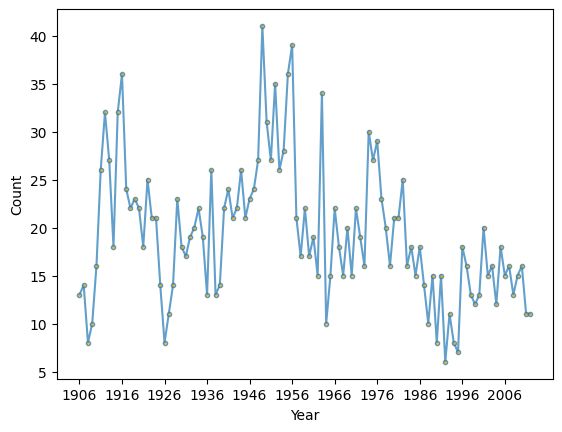

In [49]:
# earthquake data from http://earthquake.usgs.gov/
earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11])


# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(earthquakes, ".-", ms=6, mfc="orange", alpha=0.7)
ax.set_xticks(range(0, earthquakes.size, 10))
ax.set_xticklabels(range(1906, 2007, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
fig.show()

It is possible to broaden HMM's horizons by associating the classical model with probability laws for example, such as the **Poisson law**, which is the one commonly used to describe the occurence of important earthquakes

In [50]:
scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes[:, None])
        models.append(model)
        scores.append(model.score(earthquakes[:, None]))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(earthquakes[:, None])

Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -341.89397049875447
Converged: True		Score: -341.88244772721396
Converged: True		Score: -342.14454823785394
Converged: True		Score: -341.89296748597104
Converged: True		Score: -341.8855538199331
Converged: True		Score: -342.28762276127594
Converged: True		Score: -342.5369292103581
Converged: True		Score: -341.88750207762195
Converged: True		Score: -341.87893633799735
Converged: True		Score: -342.9703881743685
Converged: True		Score: -343.0429169039876
Converged: True		Score: -342.0845203955183
Converged: True		Score: -342.6892743201989
Conv

Let’s plot the waiting times from our most likely series of states of earthquake activity with the earthquake data. As we can see, the model with the maximum likelihood had different states which may reflect times of varying earthquake danger.

Text(0, 0.5, 'State')

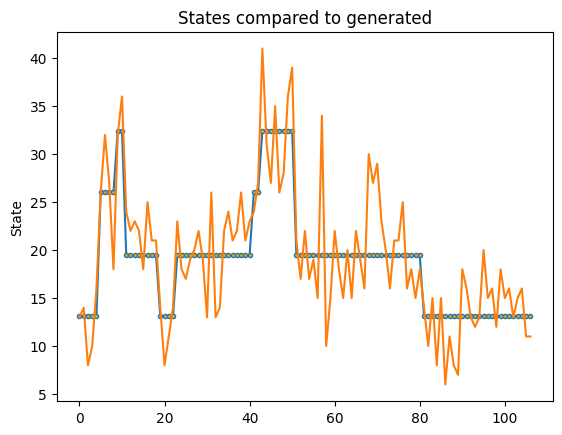

In [51]:
# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
ax.plot(earthquakes)
ax.set_title('States compared to generated')
ax.set_ylabel('State')

As we can see, the states tend to remain for a while before changing, probably meaning that the off-diagonal cells of the transition matrix must be quite small. 

Let's test this theory

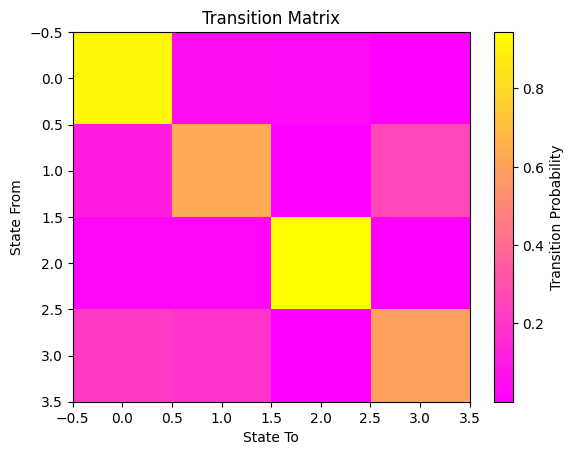

In [52]:
fig, ax = plt.subplots()
img = ax.imshow(model.transmat_, aspect='auto', cmap='spring')
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('Transition Probability')

plt.show()

The diagonal having more important coefficient that the rest means that once a state is reached, it tends to be stationnary, therefore the odds are that, after 2007, the seismic activity should remain relatively calm

And indeed, if we add the years [2008 to 2023](https://earthquake.usgs.gov/earthquakes/browse/m7-world.php?year=2023):

Text(0, 0.5, 'State')

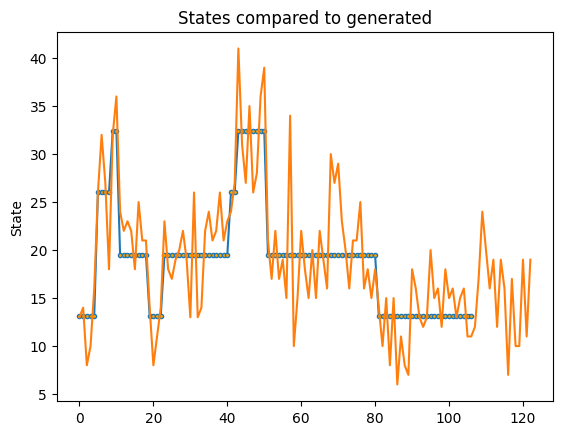

In [53]:
earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11, 12, 17, 24, 20, 16,
    19, 12, 19, 16, 7, 17, 10, 10, 19, 11, 19])

# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
ax.plot(earthquakes)
ax.set_title('States compared to generated')
ax.set_ylabel('State')

As we can see, the tendency stayed roughly the same.

## Conclusion

Throughout this notebook, we came to understand HMMs, which are a branch of the well known Markov Process field. By resolving the 3 fundamentals problems of HMMs, many real world applications can be made.

However, this field of theory dates back to the seventies. Although it was a pioneer tool in text generation, it is nowadays outmatched by more recent deep leaning theories such as **Recurrent Neural Networks** when it comes to Natural Language Processing.

Despite this, it still has numerous applications in [**Computational Biology**](https://www.sciencedirect.com/science/article/pii/S1672022904020145), such as protein sequences classification or genomic annotation. 

## Bibliography

- Notebook based on Stanford University's [tutorial](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiTn7Lp2qOEAxXIUaQEHexfCYQQFnoECBsQAQ&url=https%3A%2F%2Fweb.stanford.edu%2F~jurafsky%2Fslp3%2FA.pdf&usg=AOvVaw34zbZeSIlMGKQINMfFAuw3&opi=89978449) 

- You can find a notebook on the same subject with mathematical proofs [here](https://github.com/Julien6431/Hidden-Markov-Models/blob/main/HMM.ipynb)


